💡 Probleme
Ce îi poate face pe oameni fericiți? Se consideră problema predicției gradului de fericire a populației globului folosind informații despre diferite caracteristici a bunăstării respectivei populații precum Produsul intern brut al țării în care locuiesc (gross domestic product – GBP), gradul de fericire, etc.

Folsind datele aferente anului 2017 (fisierul v1_world-happiness-report-2017.csv), să se realizeze o predicție a gradului de fericire în funcție:

- doar de Produsul intern brut (exemplu detaliat live - demo)
- doar de caracteristica "Family" (tema)
- de Produsul intern brut si de gradul de libertate (temă).

Rezolvati problema si pentru cazurile in care datele sunt preluate din fisierul:

v2_world-happiness-report-2017.csv
v3_world-happiness-report-2017.csv

In [36]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from myRegression import MyLinearUnivariateRegression
from myRegression2 import MyLinearMultivariateRegression

Load data

In [48]:
def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for i, row in enumerate(csv_reader):
            if i == 0:
                dataNames = row
            else:
                data.append(row)

    selectedVariable = dataNames.index(inputVariabName)
    selectedOutput = dataNames.index(outputVariabName)

    inputs = []
    outputs = []
    for row in data:
        try:
            input_val = row[selectedVariable]
            output_val = row[selectedOutput]
            if input_val != '' and output_val != '':
                inputs.append(float(input_val))
                outputs.append(float(output_val))
        except (ValueError, IndexError):
            continue  # ignora randul daca da eroare

    return inputs, outputs


Plot data

In [25]:
def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

Prediction

In [64]:
def prediction_with_tool(filePath, input, output):
    inputs, outputs = loadData(filePath, input, output)

    plotDataHistogram(inputs, 'input')
    plotDataHistogram(outputs, 'Happiness score')

    # check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
    plotData(inputs, outputs, [], [], [], [], 'input vs. hapiness')

    if len(set(inputs)) == 1:
        print("Toate valorile inputului sunt egale (constante). Regresia liniară nu poate fi efectuată.")
        return

    # split data into training data (80%) and testing data (20%)
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    validationSample = [i for i in indexes  if not i in trainSample]
    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    validationInputs = [inputs[i] for i in validationSample]
    validationOutputs = [outputs[i] for i in validationSample]

    plotData(trainInputs, trainOutputs, [], [], validationInputs, validationOutputs, "train and test data")

    # training step

    # USING SKLEARN

    xx = [[el] for el in trainInputs]
    regressor = linear_model.LinearRegression()
    # regressor = linear_model.SGDRegressor(max_iter =  10000)
    regressor.fit(xx, trainOutputs)
    w0, w1 = regressor.intercept_, regressor.coef_

    # plot the model
    noOfPoints = 1000
    xref = []
    val = min(trainInputs)
    step = (max(trainInputs) - min(trainInputs)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref]
    plotData(trainInputs, trainOutputs, xref, yref, [], [], title = "train data and model")

    #makes predictions for test data
    # computedTestOutputs = [w0 + w1 * el for el in testInputs]
    #makes predictions for test data (by tool)
    computedValidationOutputs = regressor.predict([[x] for x in validationInputs])
    plotData([], [], validationInputs, computedValidationOutputs, validationInputs, validationOutputs, "predictions vs real test data")

    #compute the differences between the predictions and real outputs
    error = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputs):
        error += (t1 - t2) ** 2
    error = error / len(validationOutputs)
    print("prediction error (manual): ", error)

    error = mean_squared_error(validationOutputs, computedValidationOutputs)
    print("prediction error (tool): ", error)

In [65]:
def prediction_with_my_regression(filePath, input, output):
    inputs, outputs = loadData(filePath, input, output)

    plotDataHistogram(inputs, 'input')
    plotDataHistogram(outputs, 'Happiness score')

    # check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
    plotData(inputs, outputs, [], [], [], [], 'input vs. hapiness')

    if len(set(inputs)) == 1:
        print("Toate valorile inputului sunt egale (constante). Regresia liniară nu poate fi efectuată.")
        return

    # split data into training data (80%) and testing data (20%)
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    validationSample = [i for i in indexes  if not i in trainSample]
    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    validationInputs = [inputs[i] for i in validationSample]
    validationOutputs = [outputs[i] for i in validationSample]

    plotData(trainInputs, trainOutputs, [], [], validationInputs, validationOutputs, "train and test data")

    # training step

    # USING DEVELOPED CODE

    # model initialisation
    regressor = MyLinearUnivariateRegression()
    # training the model by using the training inputs and known training outputs
    regressor.fit(trainInputs, trainOutputs)
    # save the model parameters
    w0, w1 = regressor.intercept_, regressor.coef_
    print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

    # plot the model
    noOfPoints = 1000
    xref = []
    val = min(trainInputs)
    step = (max(trainInputs) - min(trainInputs)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref]
    plotData(trainInputs, trainOutputs, xref, yref, [], [], title = "train data and model")

    #makes predictions for test data
    # computedTestOutputs = [w0 + w1 * el for el in testInputs]
    #makes predictions for test data (by tool)
    computedValidationOutputs = regressor.predict([[x] for x in validationInputs])
    plotData([], [], validationInputs, computedValidationOutputs, validationInputs, validationOutputs, "predictions vs real test data")

    #compute the differences between the predictions and real outputs
    error = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputs):
        error += (t1 - t2) ** 2
    error = error / len(validationOutputs)
    print("prediction error (manual): ", error)

    error = mean_squared_error(validationOutputs, computedValidationOutputs)
    print("prediction error (tool): ", error)

SETUL DE DATE V1

Doar de Produsul intern brut (exemplu detaliat live - demo)

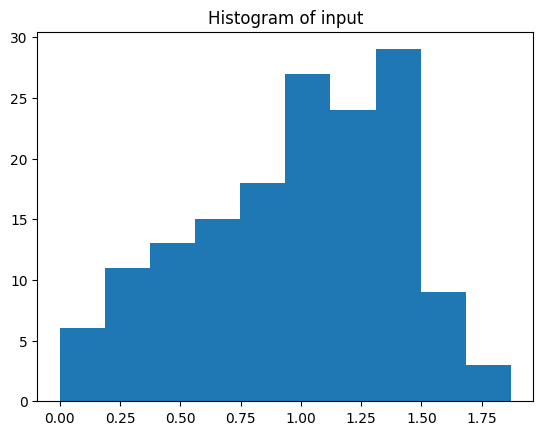

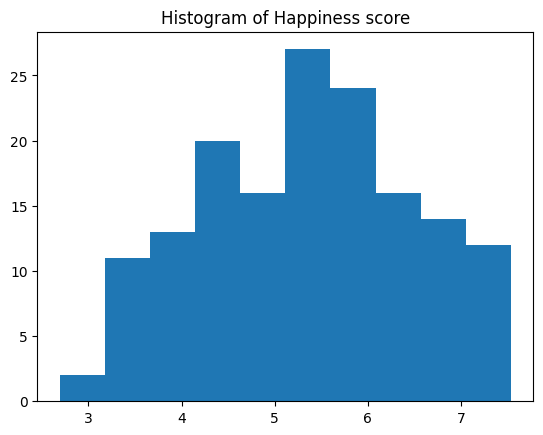

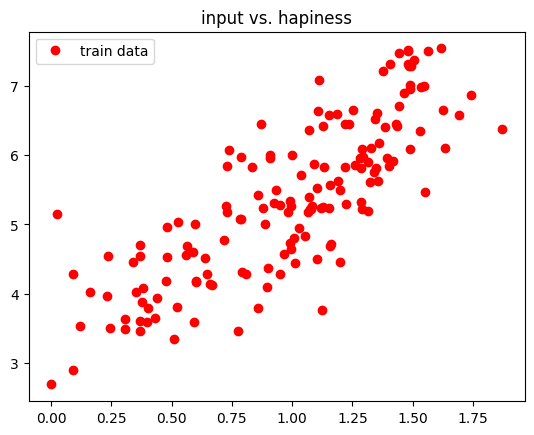

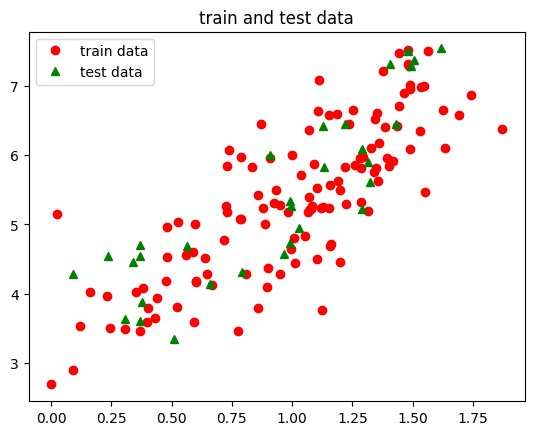

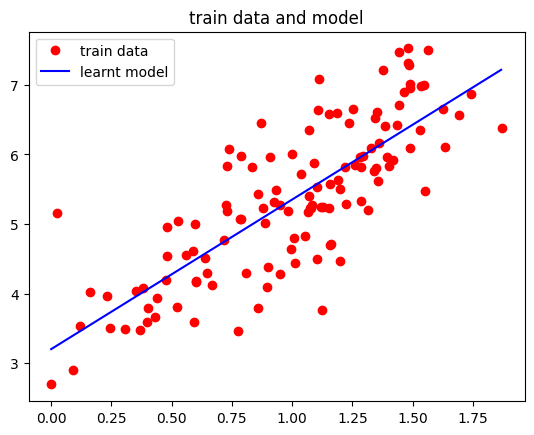

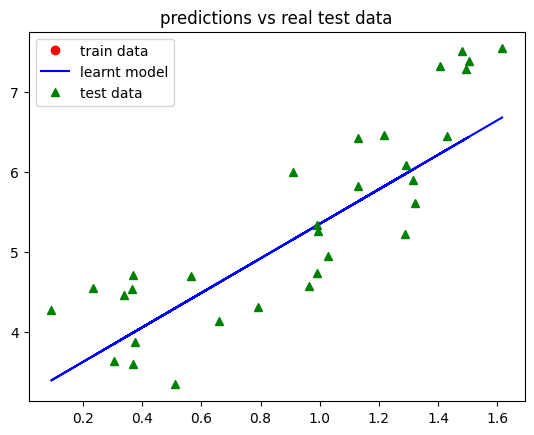

prediction error (manual):  0.4142120438505252
prediction error (tool):  0.41421204385052524


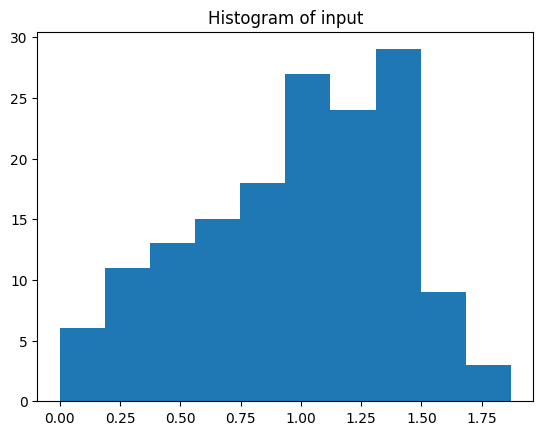

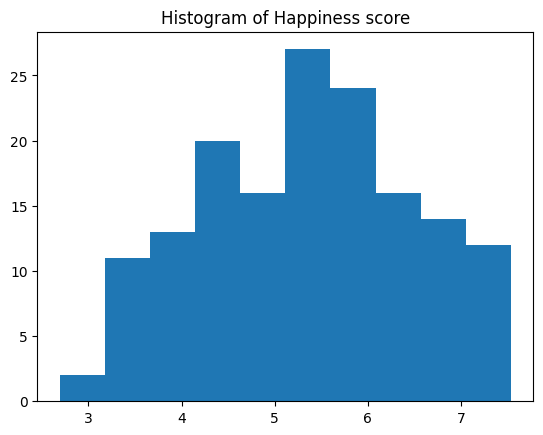

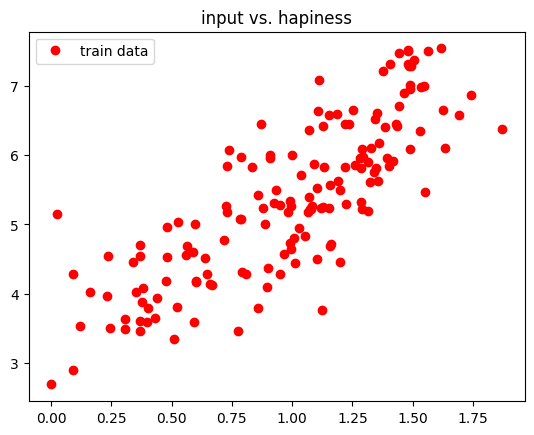

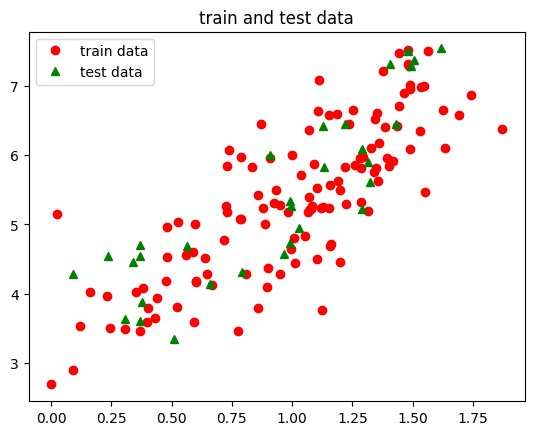

the learnt model: f(x) =  3.2007686226678964  +  2.150346096174109  * x


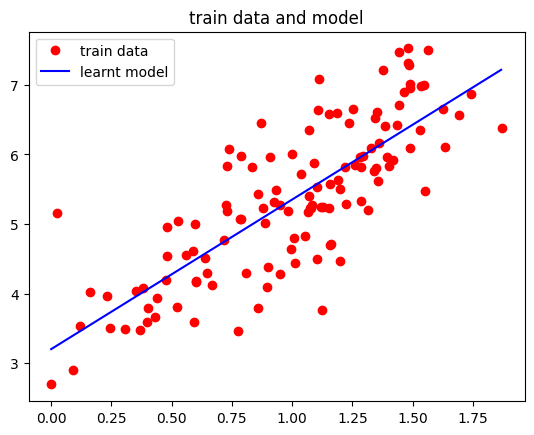

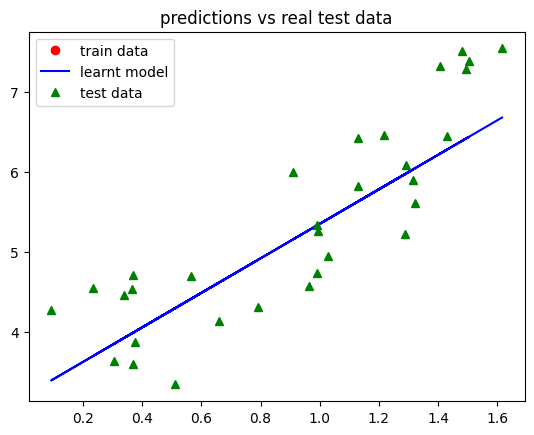

prediction error (manual):  0.4142120438505258
prediction error (tool):  0.41421204385052574


In [66]:
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v1_world-happiness-report-2017.csv')

input_string = 'Economy..GDP.per.Capita.'
output_string = 'Happiness.Score'

prediction_with_tool(filePath, input_string, output_string)
prediction_with_my_regression(filePath, input_string, output_string)

Doar de caracteristica "Family" (tema)

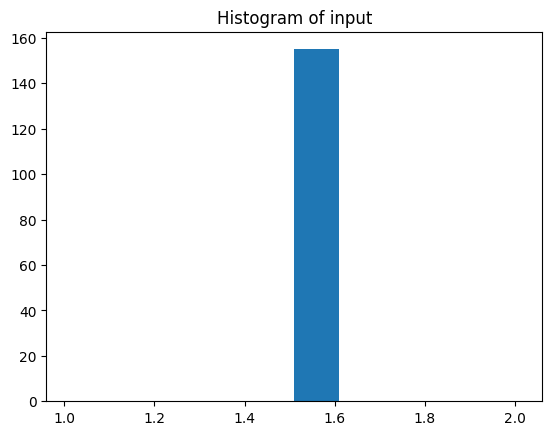

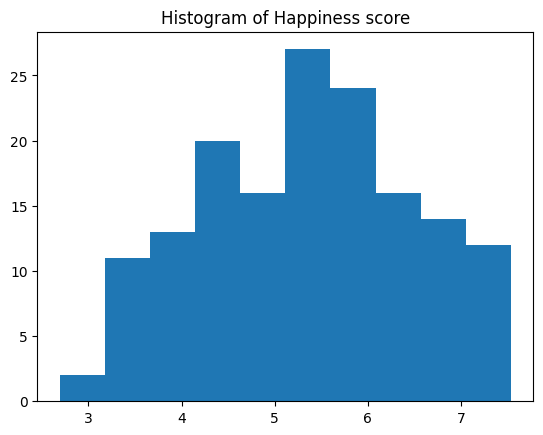

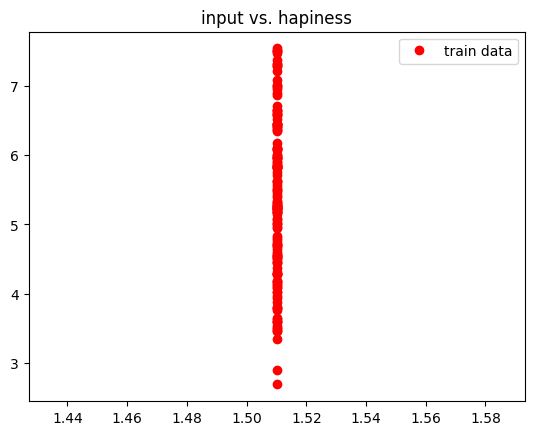

Toate valorile inputului sunt egale (constante). Regresia liniară nu poate fi efectuată.


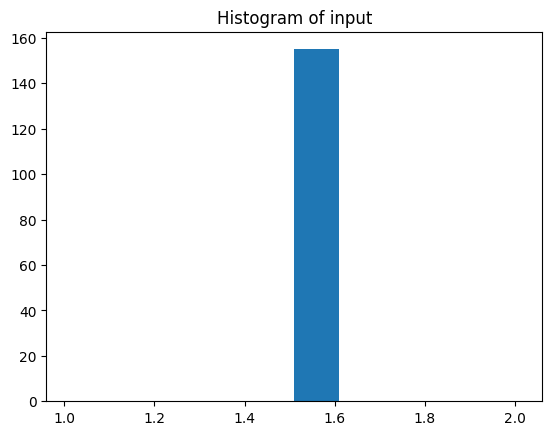

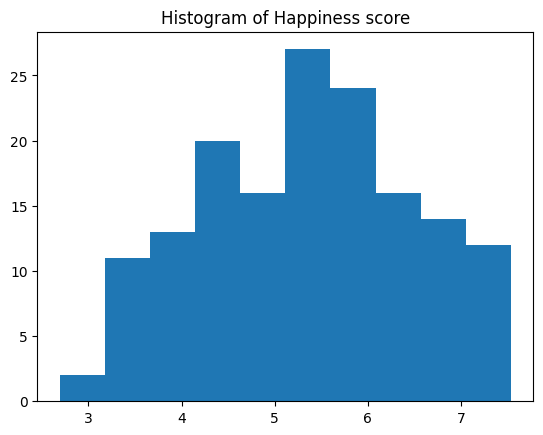

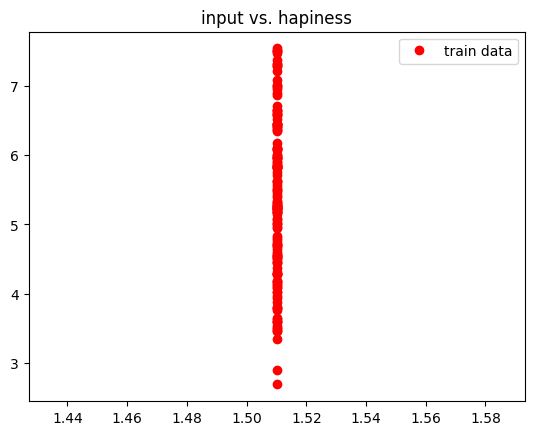

Toate valorile inputului sunt egale (constante). Regresia liniară nu poate fi efectuată.


In [67]:
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v1_world-happiness-report-2017.csv')

input_string = 'Family'
output_string = 'Happiness.Score'

prediction_with_tool(filePath, input_string, output_string)
prediction_with_my_regression(filePath, input_string, output_string)

De Produsul intern brut si de gradul de libertate (temă).

Load Data pentru 2 variabile

In [68]:
def loadData2Var(fileName, inputVar1, inputVar2, outputVar):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for i, row in enumerate(csv_reader):
            if i == 0:
                dataNames = row
            else:
                data.append(row)

    index1 = dataNames.index(inputVar1)
    index2 = dataNames.index(inputVar2)
    indexOutput = dataNames.index(outputVar)

    inputs = []
    outputs = []

    for row in data:
        try:
            val1 = row[index1]
            val2 = row[index2]
            outVal = row[indexOutput]
            if val1 != '' and val2 != '' and outVal != '':
                inputs.append((float(val1), float(val2)))
                outputs.append(float(outVal))
        except (ValueError, IndexError):
            continue  # ignoră rândul dacă apare o problemă

    return inputs, outputs


Plot data pt 2 variabile

In [31]:
def plot3D(trainInputs, trainOutputs, model=None, validationInputs=None, validationOutputs=None):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = [el[0] for el in trainInputs]
    ys = [el[1] for el in trainInputs]
    zs = trainOutputs
    ax.scatter(xs, ys, zs, c='r', marker='o', label="Train data")

    if model:
        xref = np.linspace(min(xs), max(xs), 10)
        yref = np.linspace(min(ys), max(ys), 10)
        xref, yref = np.meshgrid(xref, yref)
        zref = model[0] + model[1] * xref + model[2] * yref
        ax.plot_surface(xref, yref, zref, alpha=0.5)

    if validationInputs:
        xs2 = [el[0] for el in validationInputs]
        ys2 = [el[1] for el in validationInputs]
        zs2 = validationOutputs
        ax.scatter(xs2, ys2, zs2, c='g', marker='^', label="Test data")

    ax.set_xlabel('GDP')
    ax.set_ylabel('Family')
    ax.set_zlabel('Happiness')
    ax.legend()
    plt.show()


Prediction cu tool pentru 2 variabile

In [32]:
def prediction_with_tool_2(filePath, input1, input2, output):
    inputs, outputs = loadData2Var(filePath, input1, input2, output)

    inputs1 = [el[0] for el in inputs]
    inputs2 = [el[1] for el in inputs]

    plotDataHistogram(inputs1, input1)
    plotDataHistogram(inputs2, input2)
    plotDataHistogram(outputs, output)

    # split data
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    validationSample = [i for i in indexes if i not in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    validationInputs = [inputs[i] for i in validationSample]
    validationOutputs = [outputs[i] for i in validationSample]

    plot3D(trainInputs, trainOutputs, None, validationInputs, validationOutputs)

    # training
    regressor = linear_model.LinearRegression()
    regressor.fit(trainInputs, trainOutputs)

    w0 = regressor.intercept_
    w1, w2 = regressor.coef_

    print("Model learned: f(x1, x2) = {:.4f} + {:.4f} * x1 + {:.4f} * x2".format(w0, w1, w2))

    plot3D(trainInputs, trainOutputs, (w0, w1, w2), validationInputs, validationOutputs)

    computedValidationOutputs = regressor.predict(validationInputs)

    plt.scatter(range(len(validationOutputs)), validationOutputs, c='g', label='Real')
    plt.scatter(range(len(computedValidationOutputs)), computedValidationOutputs, c='r', label='Predicted')
    plt.legend()
    plt.title('Real vs Predicted values')
    plt.show()

    error_manual = sum([(a - b) ** 2 for a, b in zip(validationOutputs, computedValidationOutputs)]) / len(validationOutputs)
    print("Prediction error (manual): ", error_manual)

    error_tool = mean_squared_error(validationOutputs, computedValidationOutputs)
    print("Prediction error (tool): ", error_tool)

Prediction cu myRegression pt 2 variabile

In [44]:
def prediction_with_my_regression_2(filePath, input1, input2, output):
    inputs, outputs = loadData2Var(filePath, input1, input2, output)

    inputs = [[float(x1), float(x2)] for x1, x2 in inputs]
    outputs = [float(y) for y in outputs]

    inputs1 = [el[0] for el in inputs]
    inputs2 = [el[1] for el in inputs]

    plotDataHistogram(inputs1, input1)
    plotDataHistogram(inputs2, input2)
    plotDataHistogram(outputs, output)

    # split data
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    validationSample = [i for i in indexes if i not in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    validationInputs = [inputs[i] for i in validationSample]
    validationOutputs = [outputs[i] for i in validationSample]

    plot3D(trainInputs, trainOutputs, None, validationInputs, validationOutputs)

    # training
    # USING DEVELOPED CODE

    # model initialisation
    regressor = MyLinearMultivariateRegression()
    # training the model by using the training inputs and known training outputs
    regressor.fit(trainInputs, trainOutputs)
    # save the model parameters
    w0 =  regressor.intercept_
    w1, w2 =  regressor.coef_


    print("Model learned: f(x1, x2) = {:.4f} + {:.4f} * x1 + {:.4f} * x2".format(w0, w1, w2))

    plot3D(trainInputs, trainOutputs, (w0, w1, w2), validationInputs, validationOutputs)

    computedValidationOutputs = regressor.predict(validationInputs)

    plt.scatter(range(len(validationOutputs)), validationOutputs, c='g', label='Real')
    plt.scatter(range(len(computedValidationOutputs)), computedValidationOutputs, c='r', label='Predicted')
    plt.legend()
    plt.title('Real vs Predicted values')
    plt.show()

    error_manual = sum([(a - b) ** 2 for a, b in zip(validationOutputs, computedValidationOutputs)]) / len(validationOutputs)
    print("Prediction error (manual): ", error_manual)

    error_tool = mean_squared_error(validationOutputs, computedValidationOutputs)
    print("Prediction error (tool): ", error_tool)

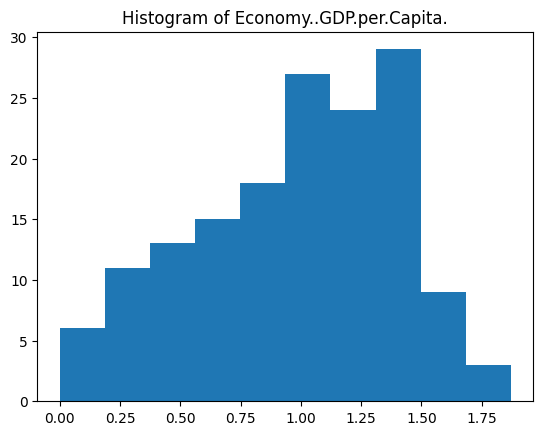

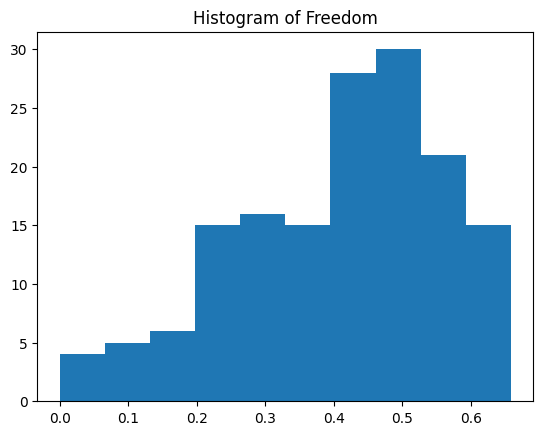

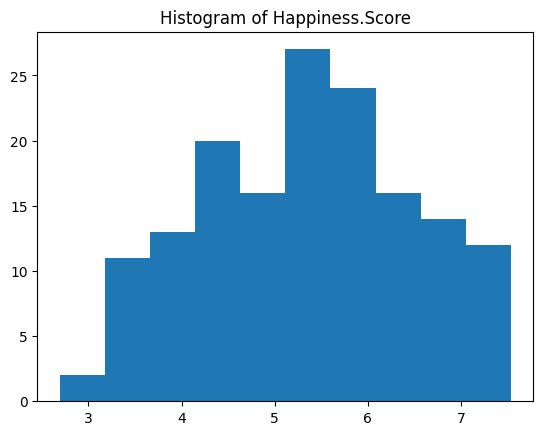

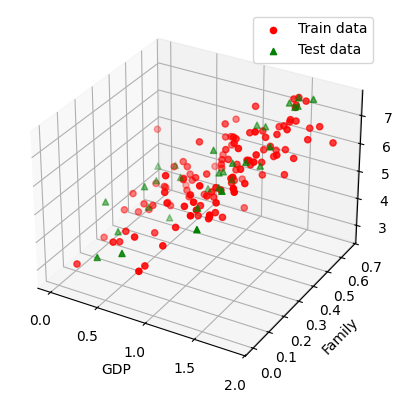

Model learned: f(x1, x2) = 2.5284 + 1.8763 * x1 + 2.3147 * x2


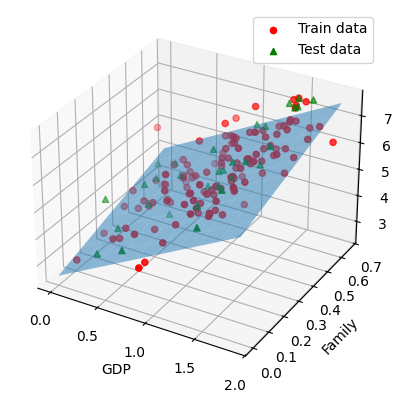

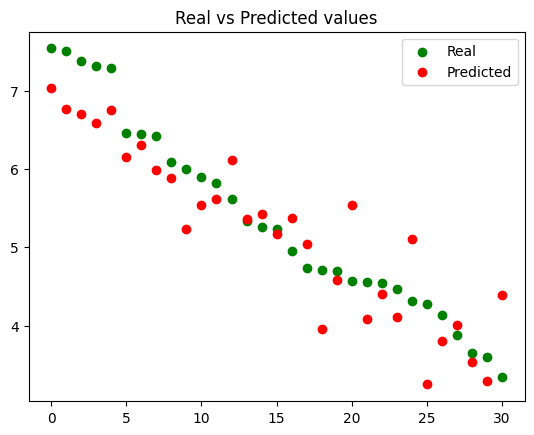

Prediction error (manual):  0.2778267436200108
Prediction error (tool):  0.2778267436200108


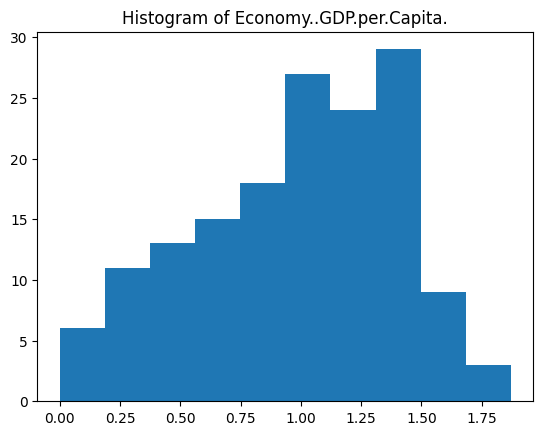

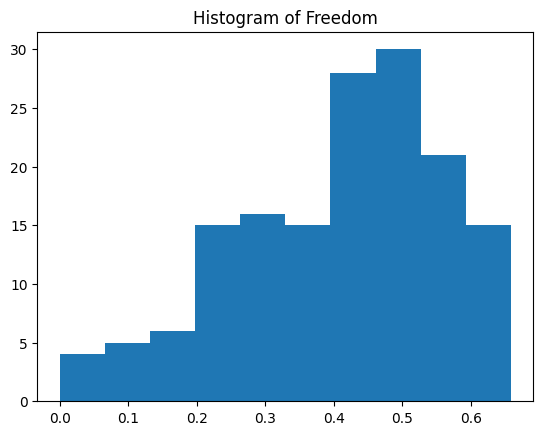

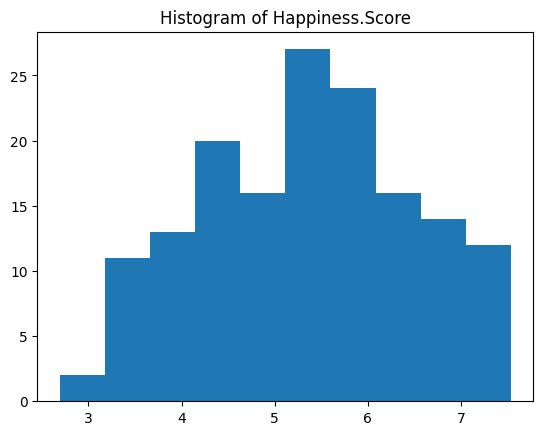

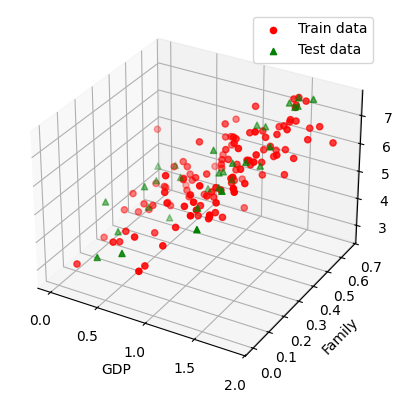

Model learned: f(x1, x2) = 1.5284 + 2.1503 * x1 + 4.0889 * x2


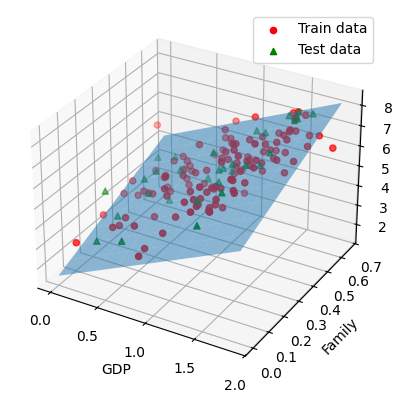

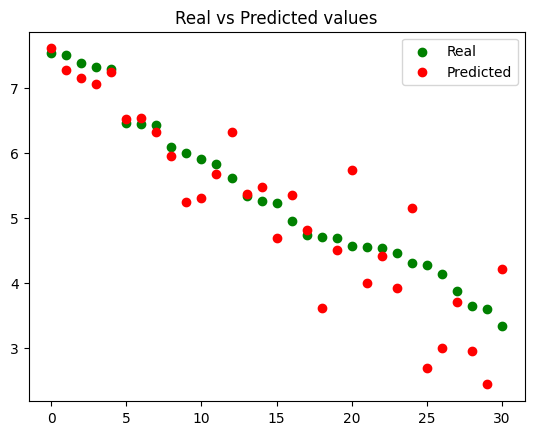

Prediction error (manual):  0.40024254467589854
Prediction error (tool):  0.40024254467589865


In [69]:
crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v1_world-happiness-report-2017.csv')

input1 = 'Economy..GDP.per.Capita.'
input2 = 'Freedom'
output = 'Happiness.Score'

prediction_with_tool_2(filePath, input1, input2, output)

prediction_with_my_regression_2(filePath, input1, input2, output)

SETUL DE DATE V2

Doar de Produsul intern brut (exemplu detaliat live - demo)

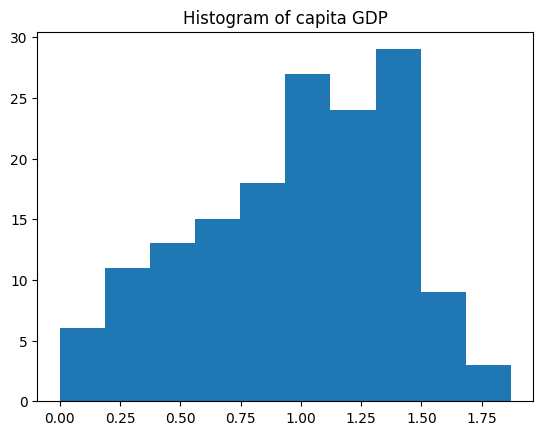

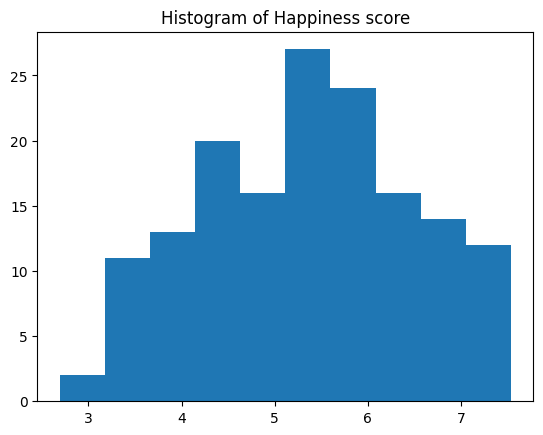

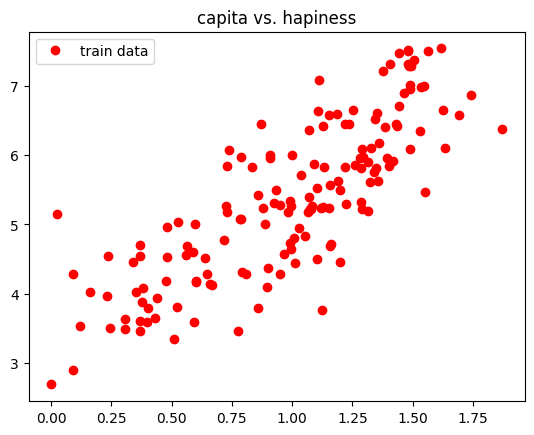

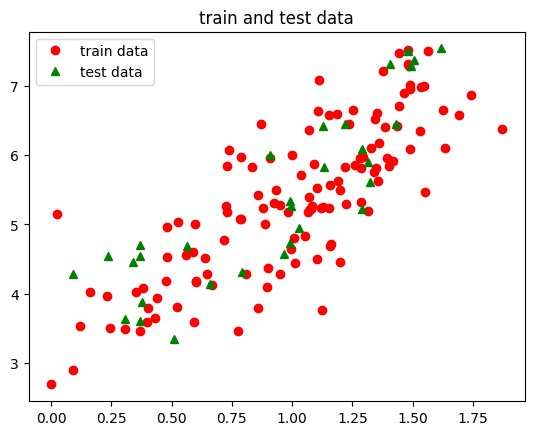

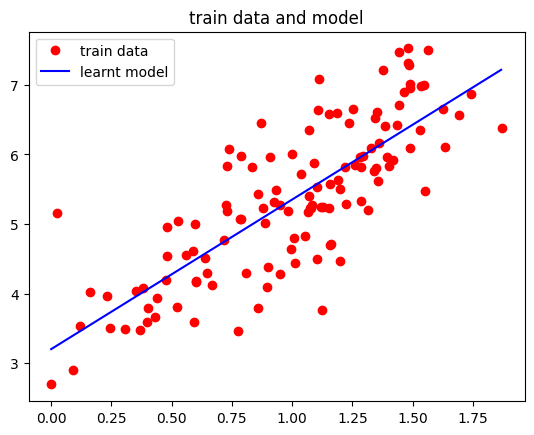

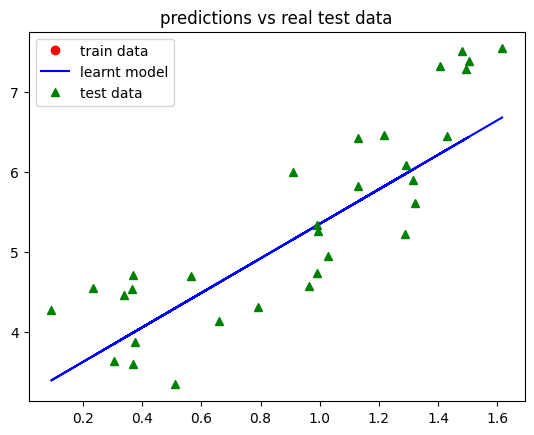

prediction error (manual):  0.4142120438505252
prediction error (tool):  0.41421204385052524


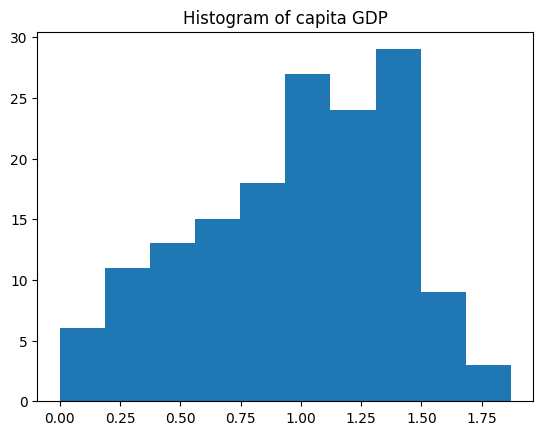

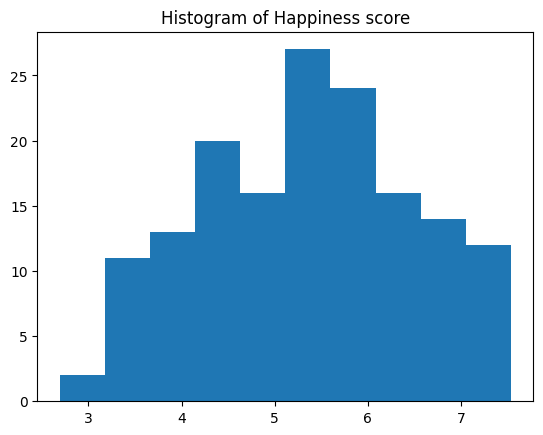

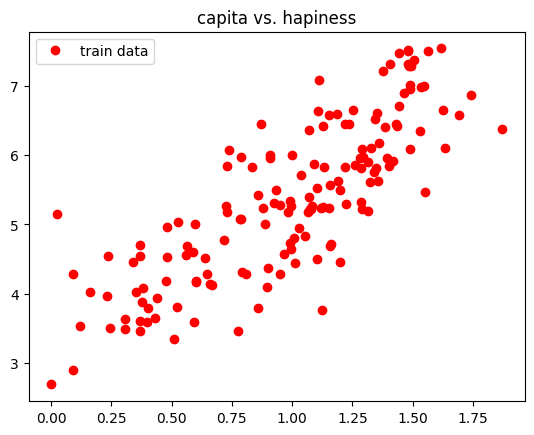

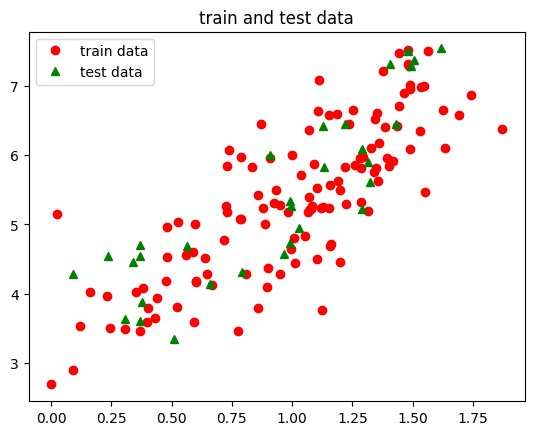

the learnt model: f(x) =  3.2007686226678964  +  2.150346096174109  * x


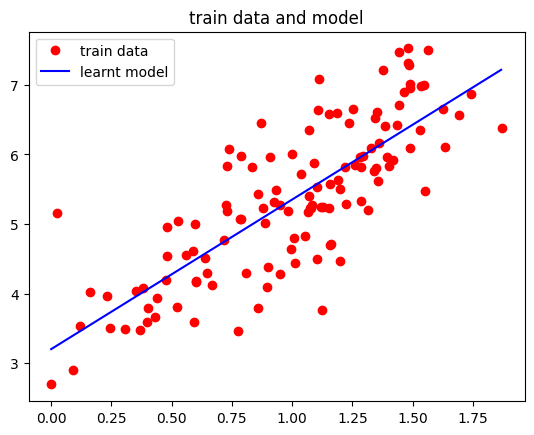

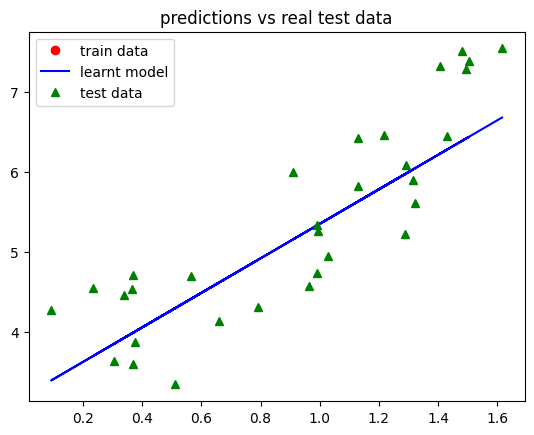

prediction error (manual):  0.4142120438505258
prediction error (tool):  0.41421204385052574


In [61]:
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v2_world-happiness-report-2017.csv')

input_string = 'Economy..GDP.per.Capita.'
output_string = 'Happiness.Score'

prediction_with_tool(filePath, input_string, output_string)
prediction_with_my_regression(filePath, input_string, output_string)

Doar de caracteristica "Family" (tema)

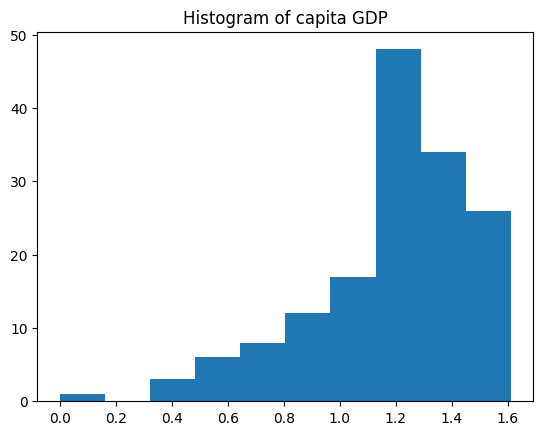

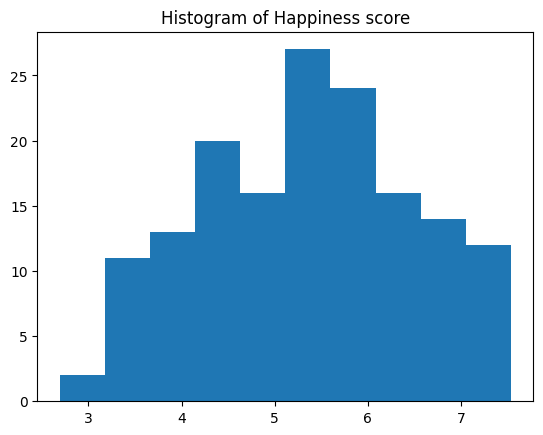

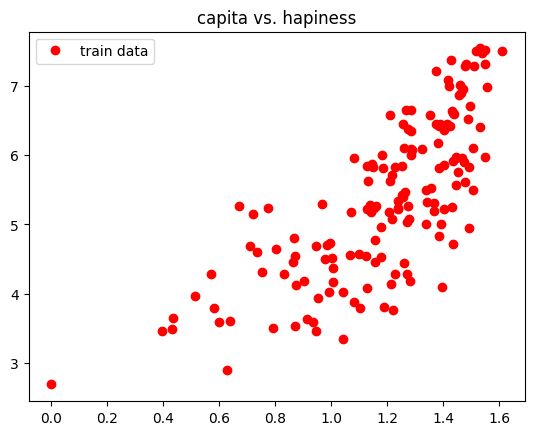

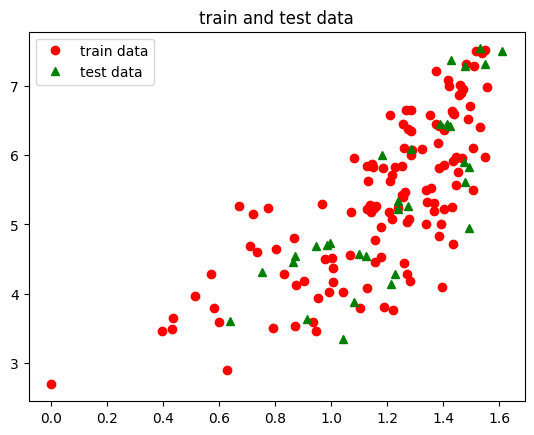

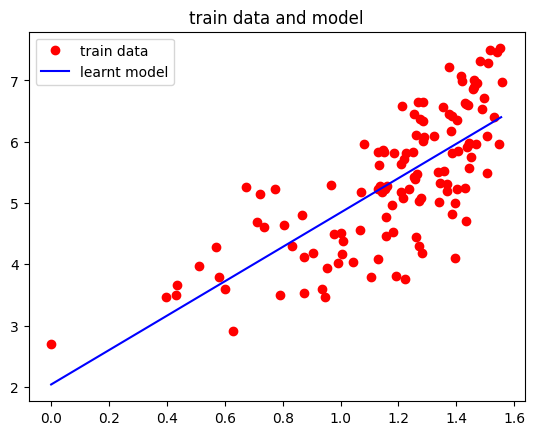

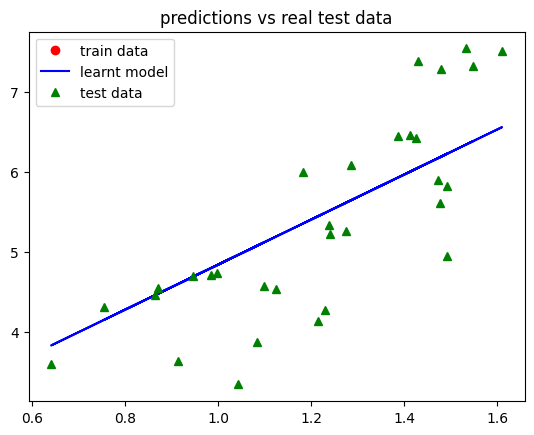

prediction error (manual):  0.6051231125473607
prediction error (tool):  0.6051231125473606


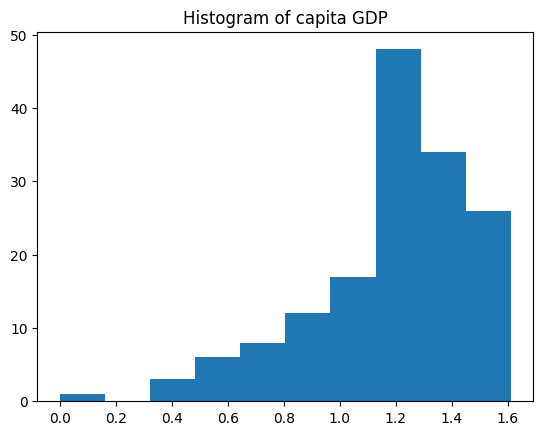

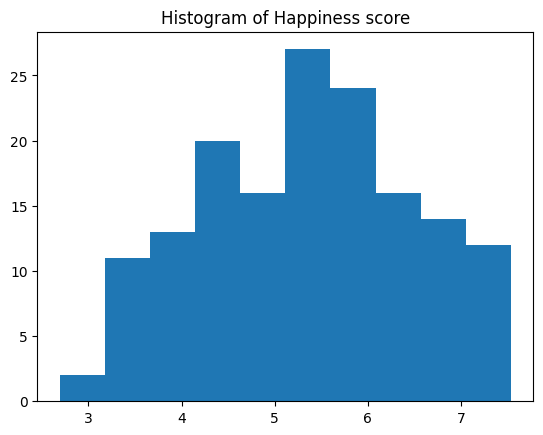

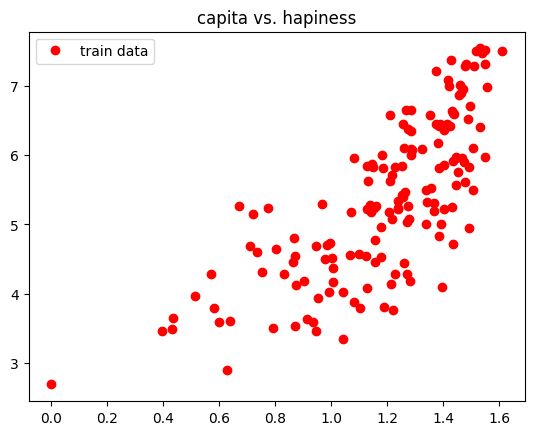

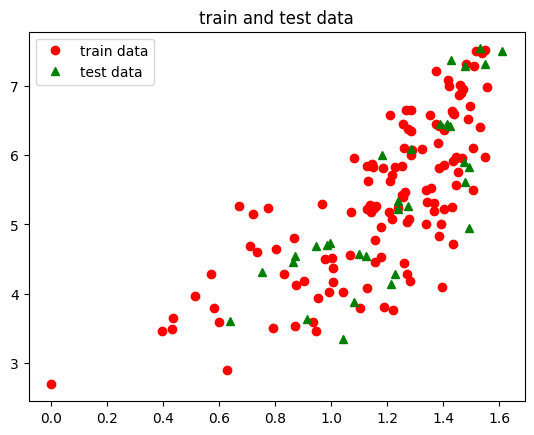

the learnt model: f(x) =  2.0390139300228274  +  2.804913617557092  * x


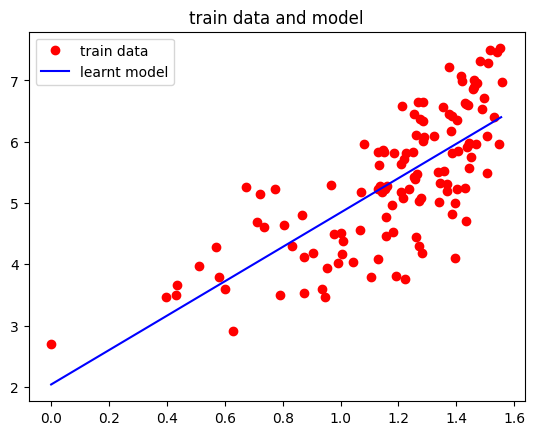

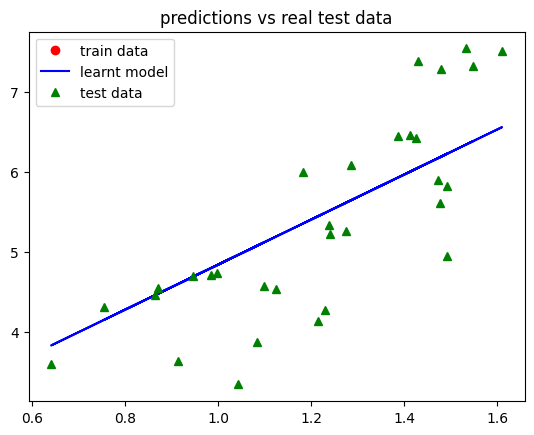

prediction error (manual):  0.6051231125473586
prediction error (tool):  0.6051231125473586


In [60]:
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v2_world-happiness-report-2017.csv')

input_string = 'Family'
output_string = 'Happiness.Score'

prediction_with_tool(filePath, input_string, output_string)
prediction_with_my_regression(filePath, input_string, output_string)

De Produsul intern brut si de gradul de libertate (temă).

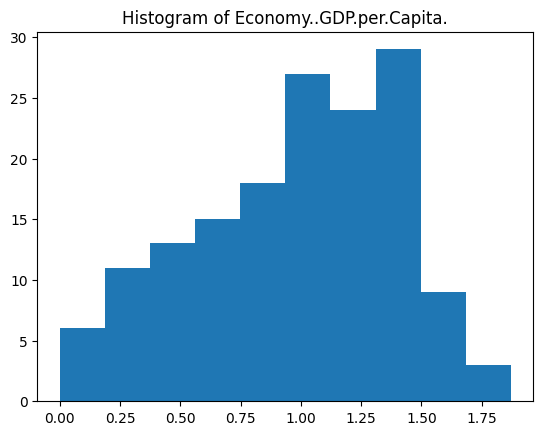

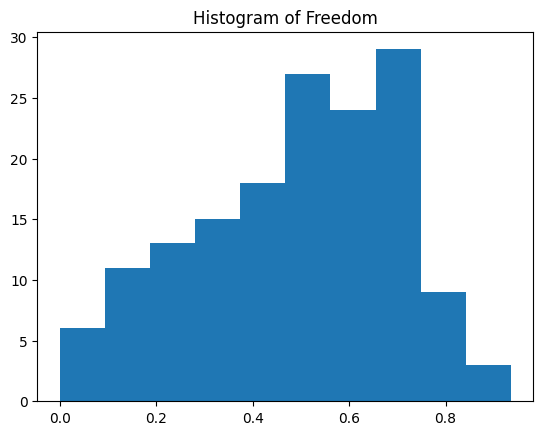

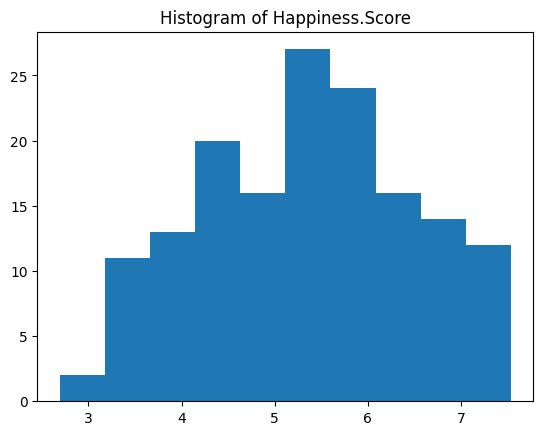

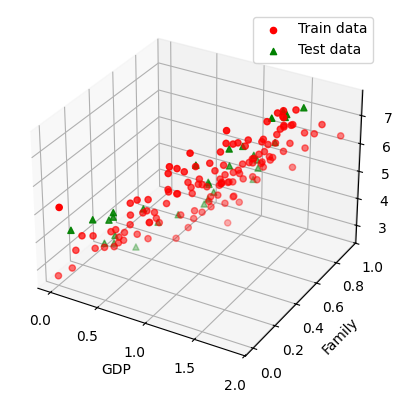

Model learned: f(x1, x2) = 3.2008 + -68616.1860 * x1 + 137236.6726 * x2


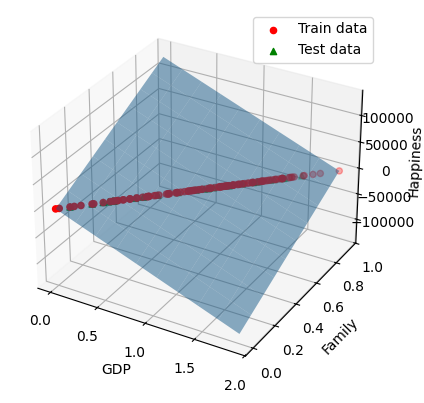

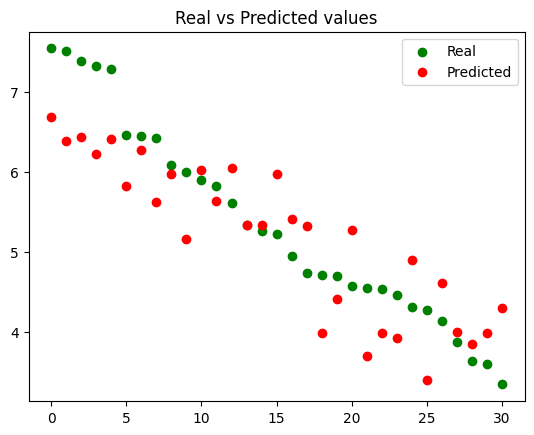

Prediction error (manual):  0.41421024295199377
Prediction error (tool):  0.4142102429519938


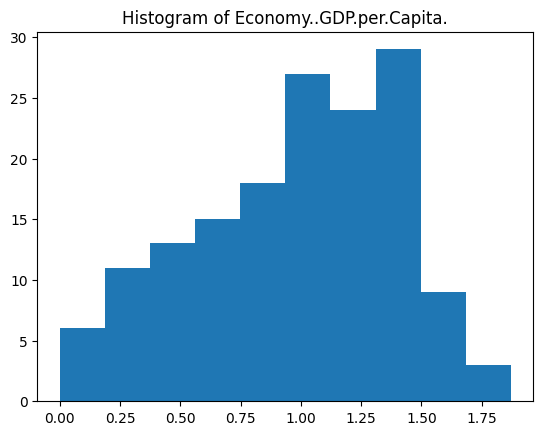

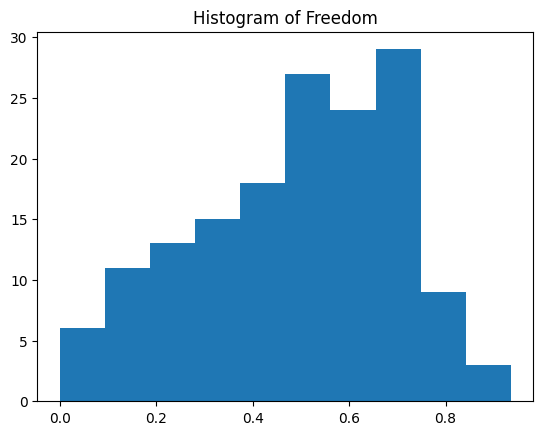

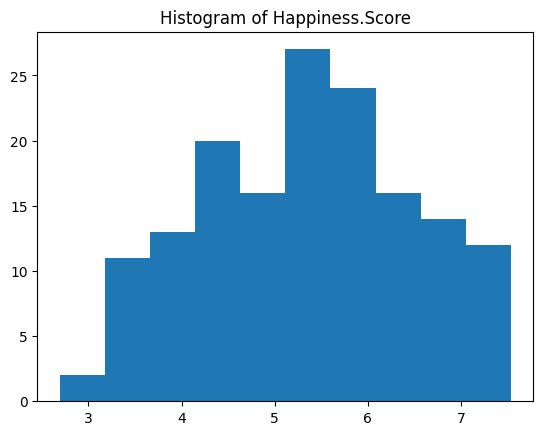

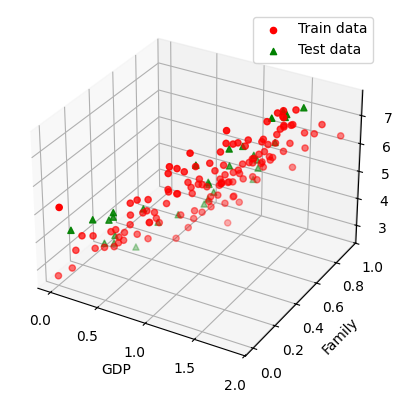

Model learned: f(x1, x2) = 1.0478 + 2.1503 * x1 + 4.3007 * x2


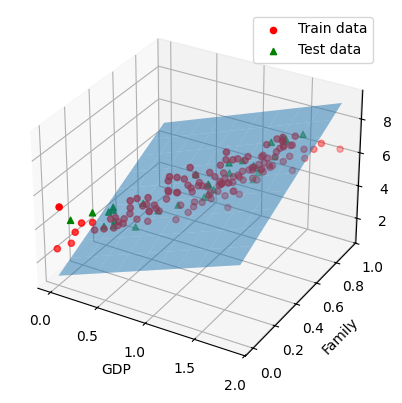

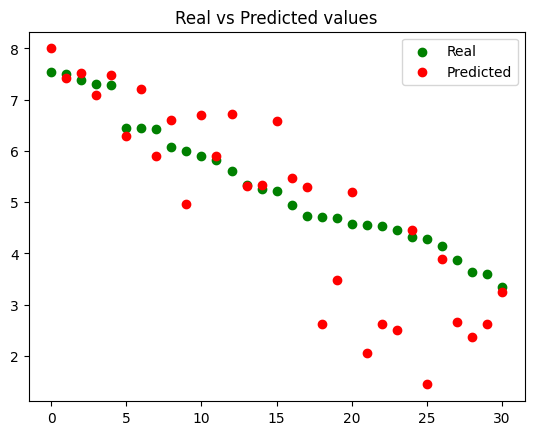

Prediction error (manual):  1.2583205756217175
Prediction error (tool):  1.2583205756217175


In [59]:
crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v2_world-happiness-report-2017.csv')

input1 = 'Economy..GDP.per.Capita.'
input2 = 'Freedom'
output = 'Happiness.Score'

prediction_with_tool_2(filePath, input1, input2, output)
prediction_with_my_regression_2(filePath, input1, input2, output)

SETUL DE DATE 3

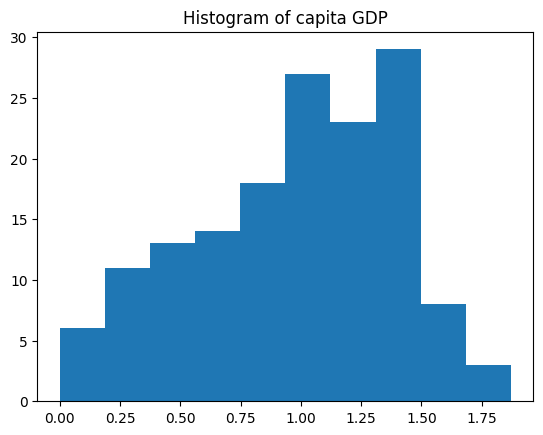

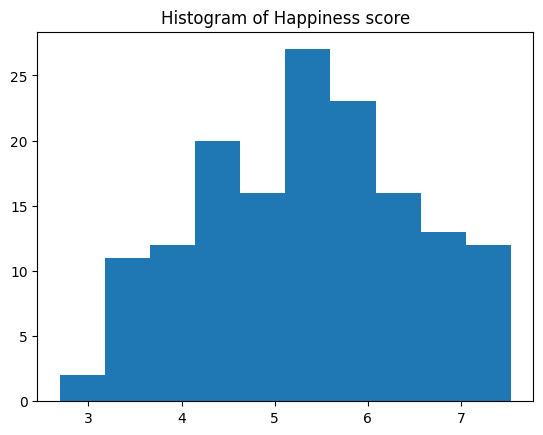

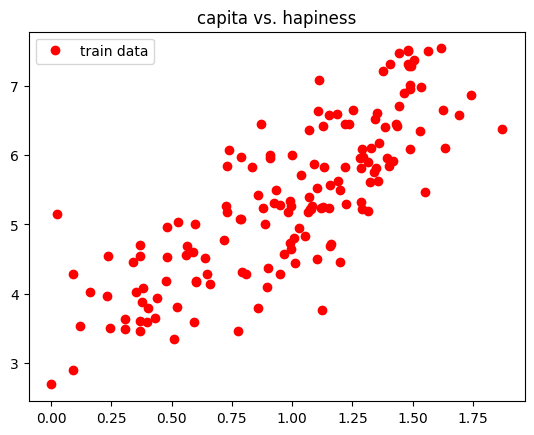

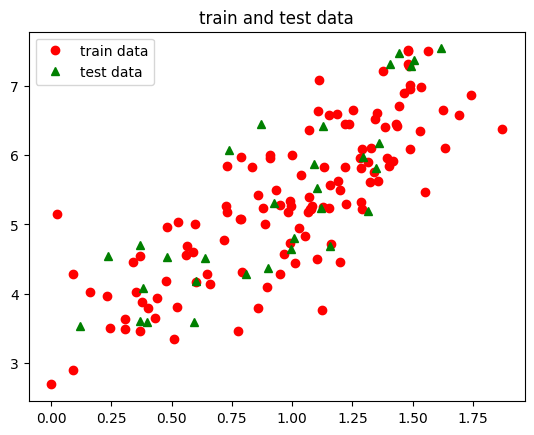

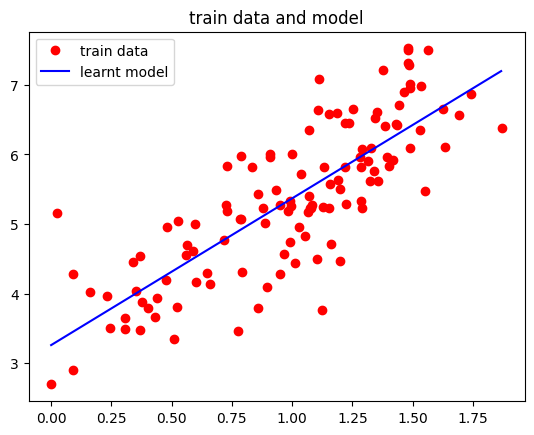

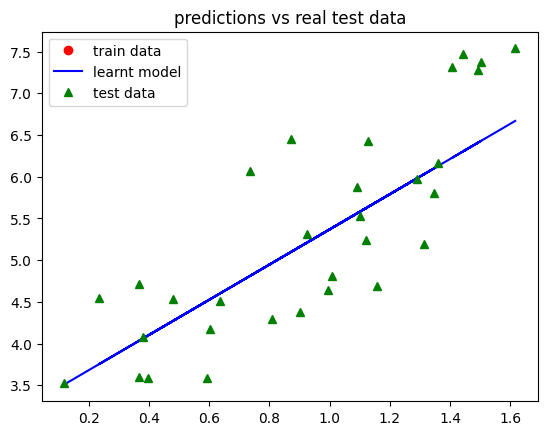

prediction error (manual):  0.5011920687289553
prediction error (tool):  0.5011920687289554


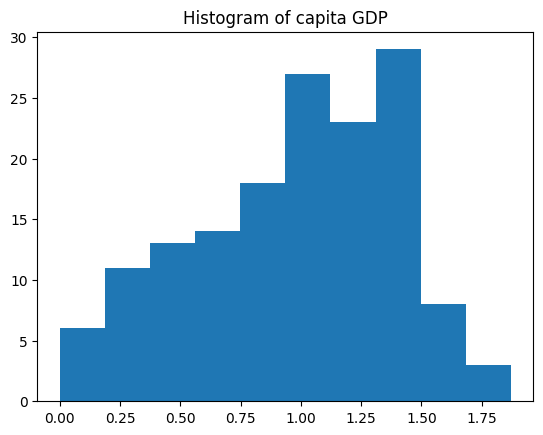

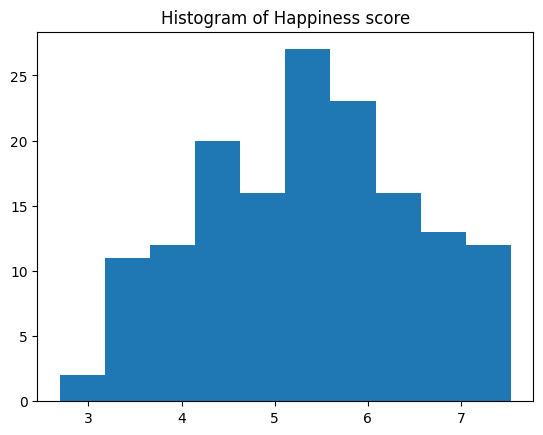

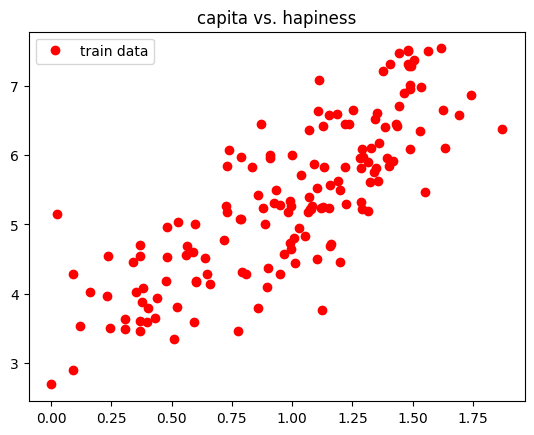

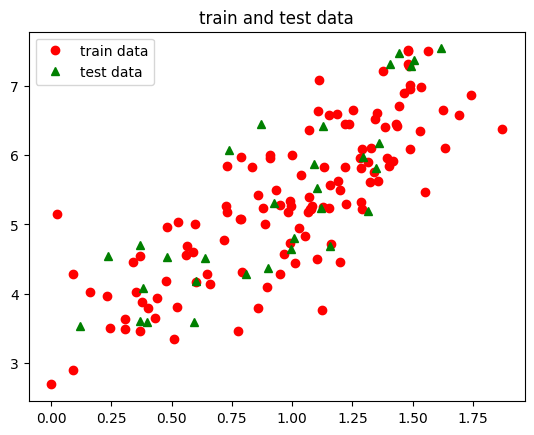

the learnt model: f(x) =  3.259066947903982  +  2.10920753695953  * x


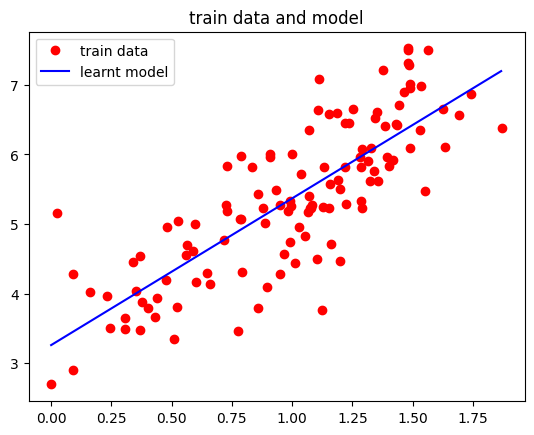

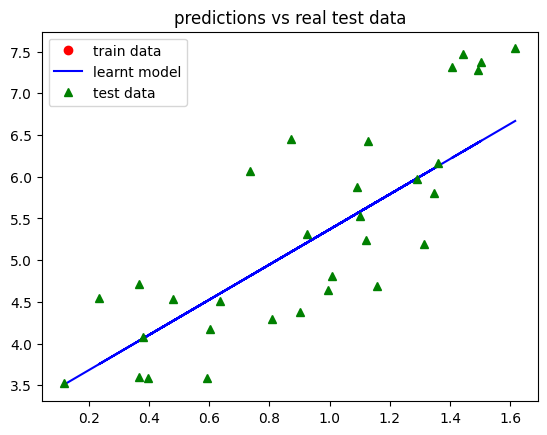

prediction error (manual):  0.5011920687289552
prediction error (tool):  0.5011920687289552


In [49]:
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v3_world-happiness-report-2017.csv')

input_string = 'Economy..GDP.per.Capita.'
output_string = 'Happiness.Score'

prediction_with_tool(filePath, input_string, output_string)
prediction_with_my_regression(filePath, input_string, output_string)

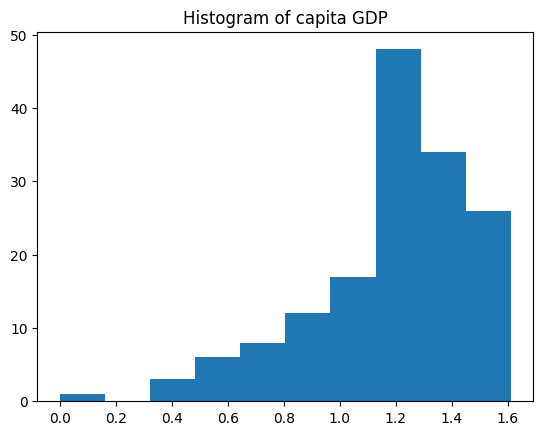

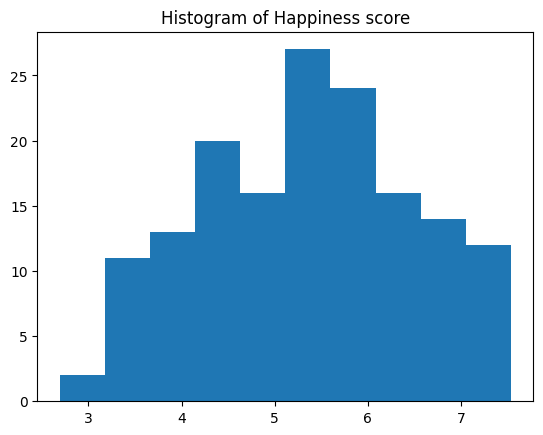

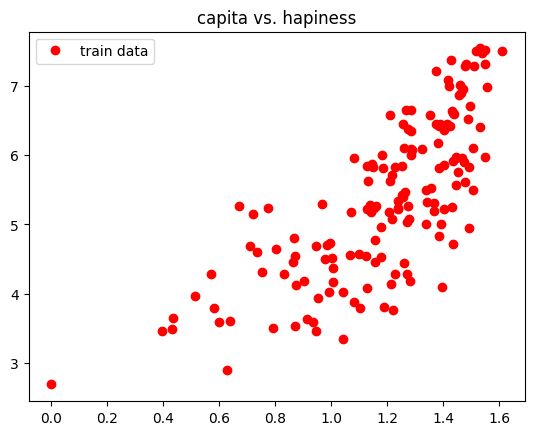

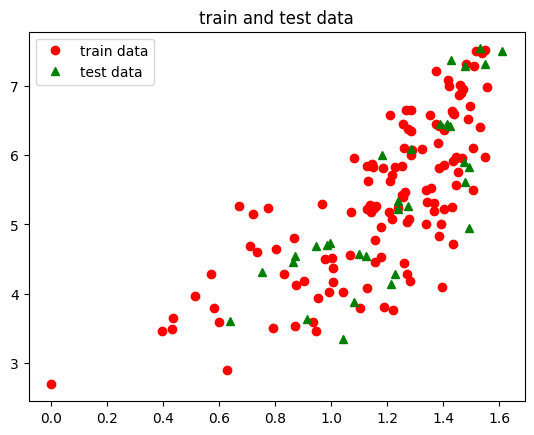

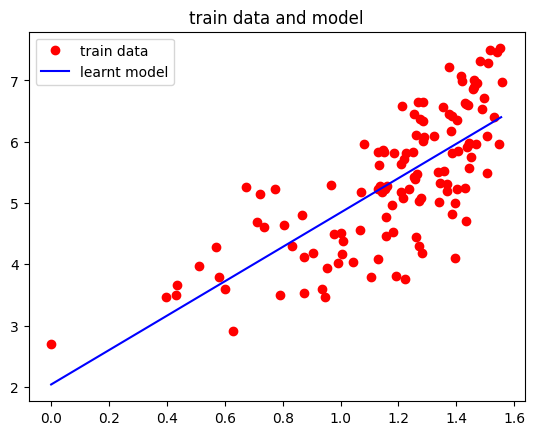

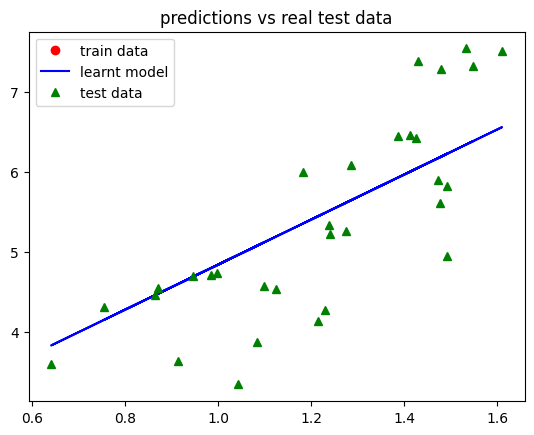

prediction error (manual):  0.6051231125473607
prediction error (tool):  0.6051231125473606


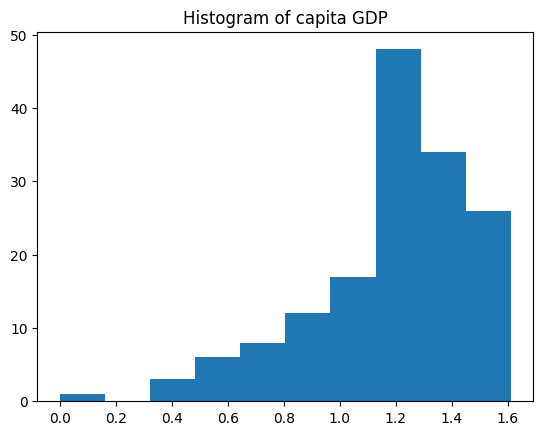

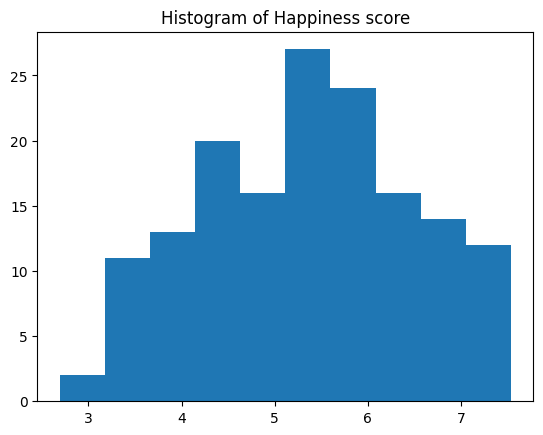

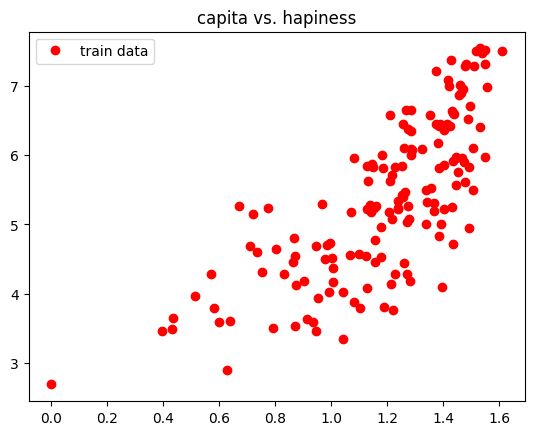

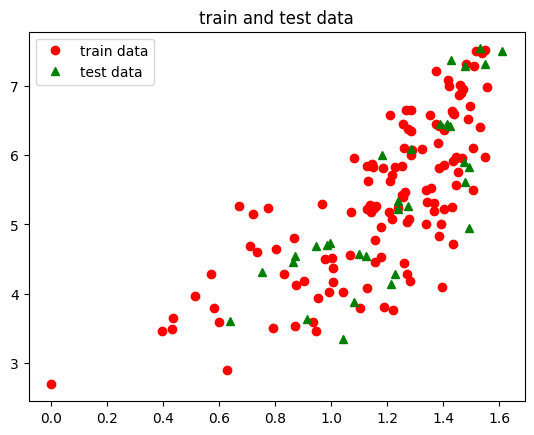

the learnt model: f(x) =  2.0390139300228274  +  2.804913617557092  * x


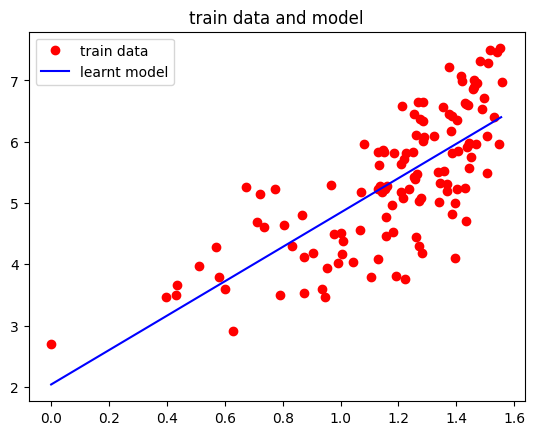

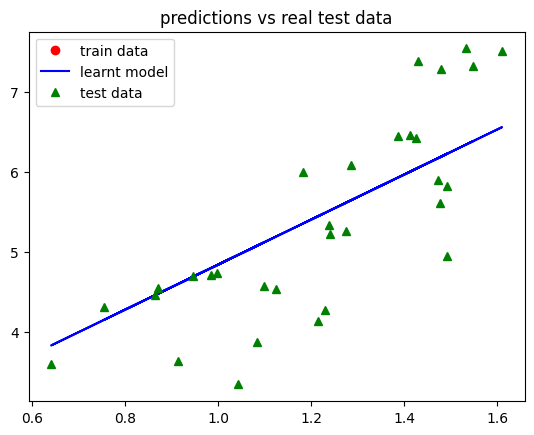

prediction error (manual):  0.6051231125473586
prediction error (tool):  0.6051231125473586


In [50]:
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v3_world-happiness-report-2017.csv')

input_string = 'Family'
output_string = 'Happiness.Score'

prediction_with_tool(filePath, input_string, output_string)
prediction_with_my_regression(filePath, input_string, output_string)

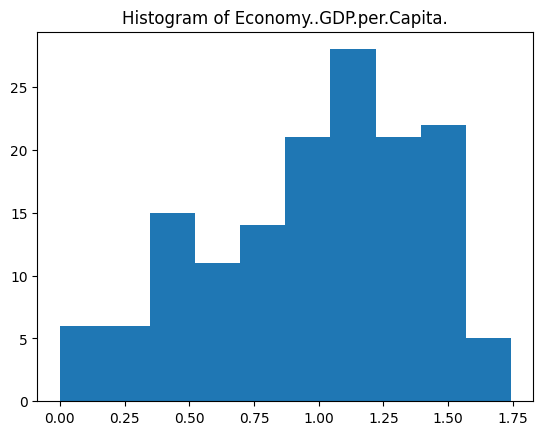

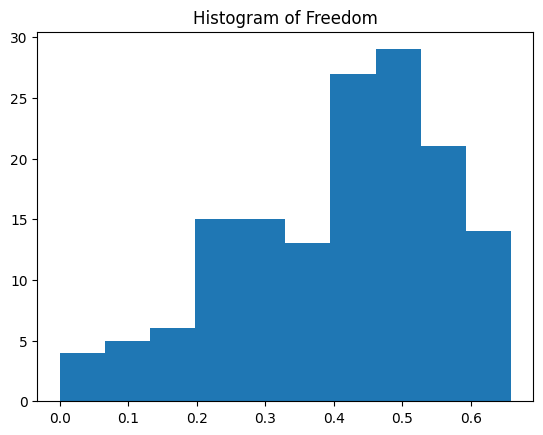

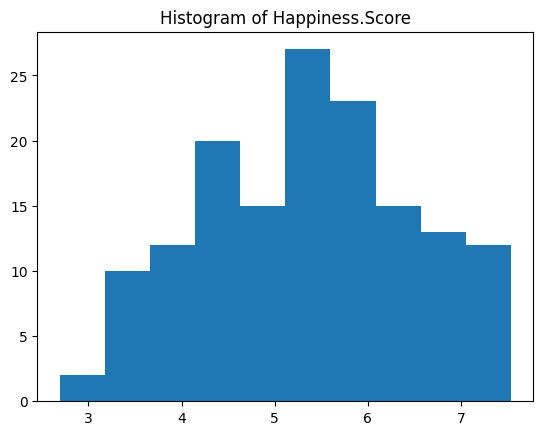

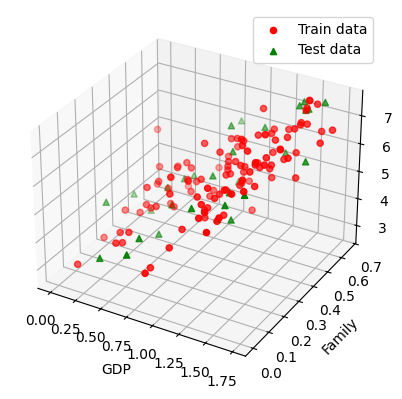

Model learned: f(x1, x2) = 2.5467 + 1.9209 * x1 + 2.2406 * x2


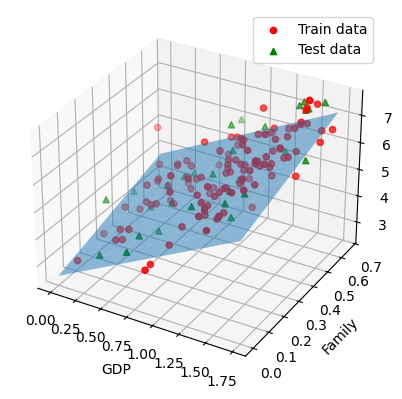

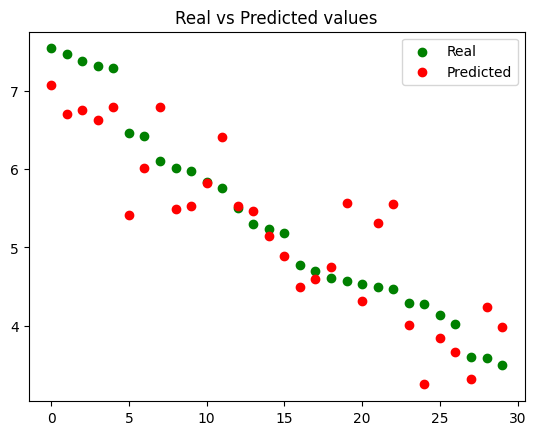

Prediction error (manual):  0.3239053614564407
Prediction error (tool):  0.32390536145644067


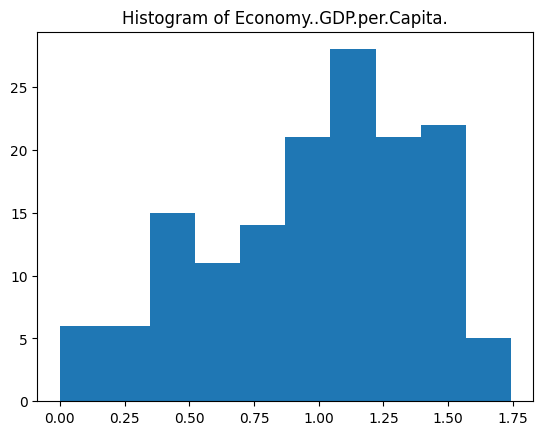

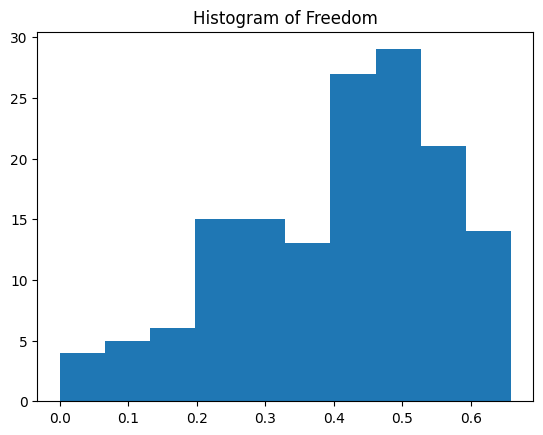

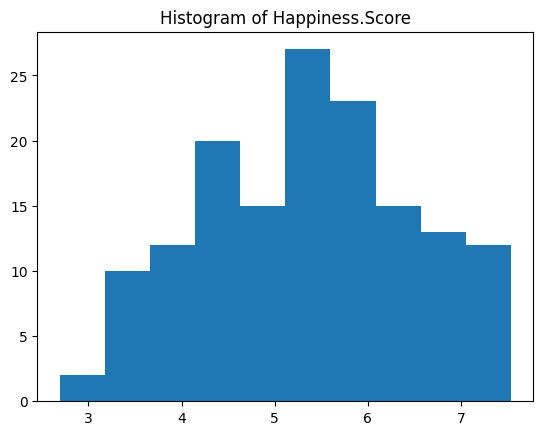

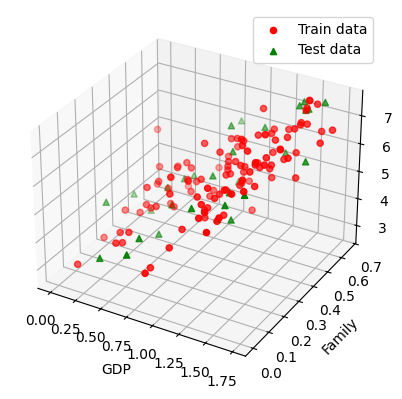

Model learned: f(x1, x2) = 1.5976 + 2.1642 * x1 + 3.9653 * x2


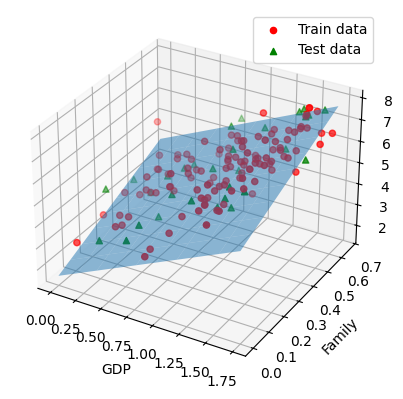

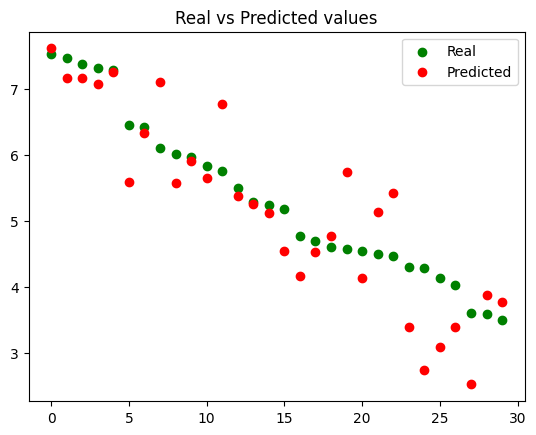

Prediction error (manual):  0.4337774650708918
Prediction error (tool):  0.4337774650708918


In [58]:
crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v3_world-happiness-report-2017.csv')

input1 = 'Economy..GDP.per.Capita.'
input2 = 'Freedom'
output = 'Happiness.Score'

prediction_with_tool_2(filePath, input1, input2, output)
prediction_with_my_regression_2(filePath, input1, input2, output)

Cerinta optionala - date corelate

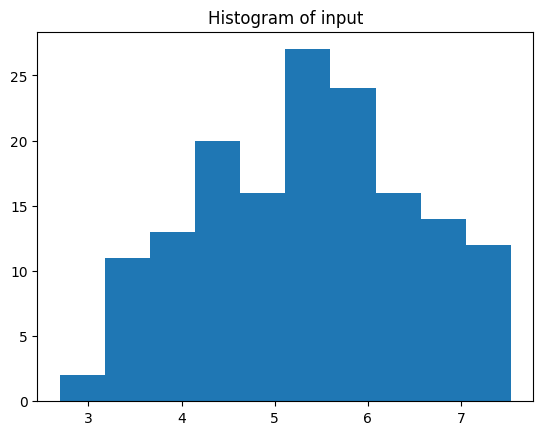

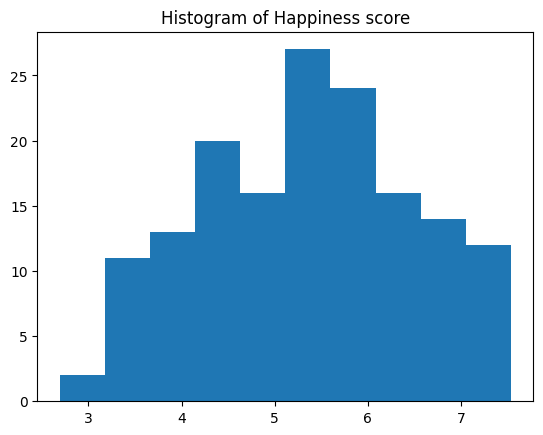

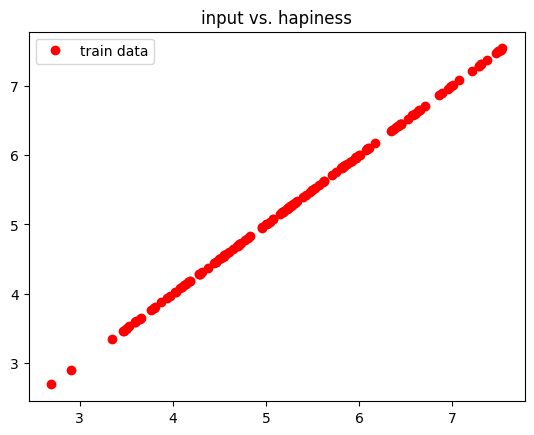

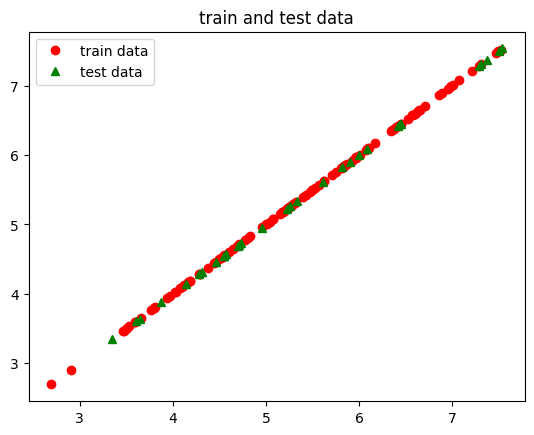

the learnt model: f(x) =  0.0  +  1.0  * x


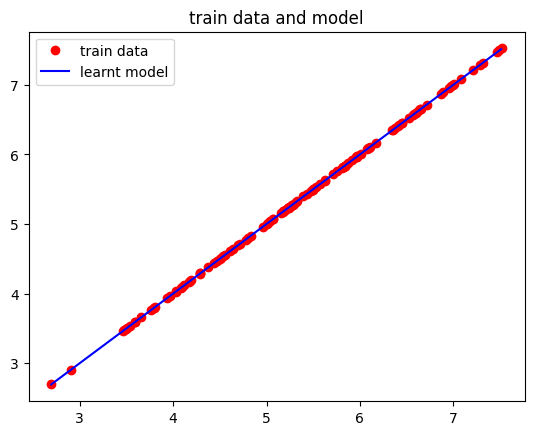

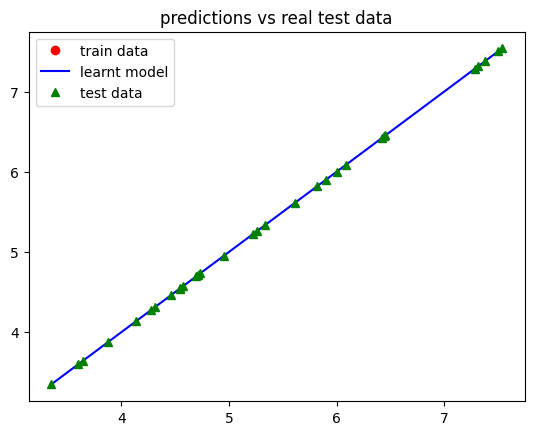

prediction error (manual):  0.0
prediction error (tool):  0.0


In [73]:
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v1_world-happiness-report-2017.csv')

input_string = 'Corelat'
output_string = 'Happiness.Score'

#prediction_with_tool(filePath, input_string, output_string)
prediction_with_my_regression(filePath, input_string, output_string)

DATE LIPSA

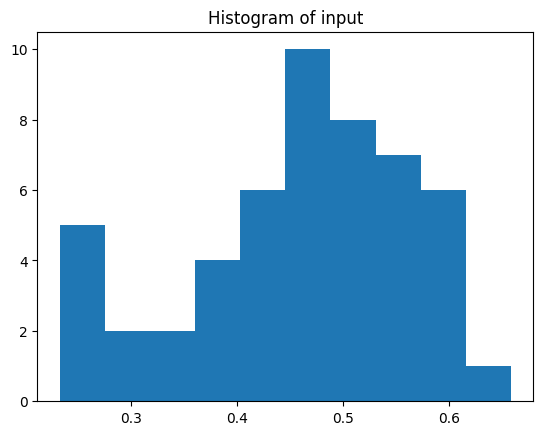

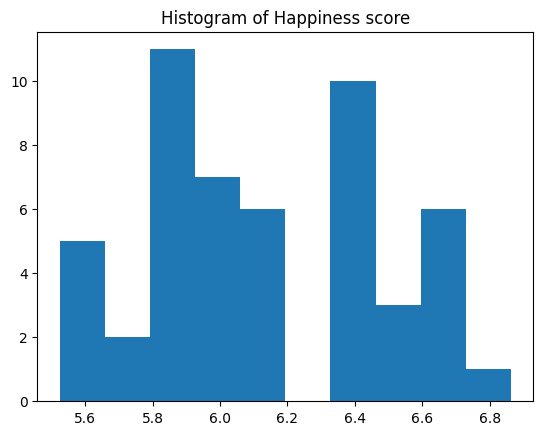

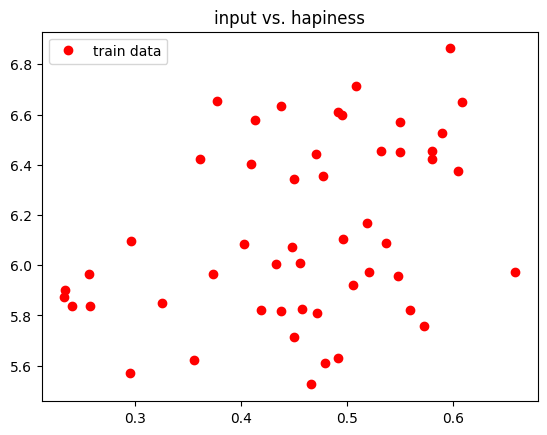

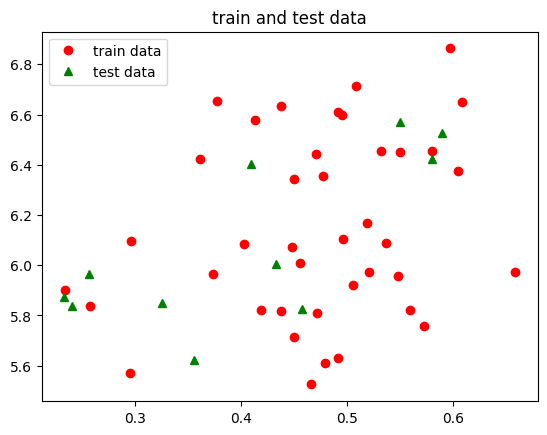

the learnt model: f(x) =  5.702887566539098  +  0.9399153968205747  * x


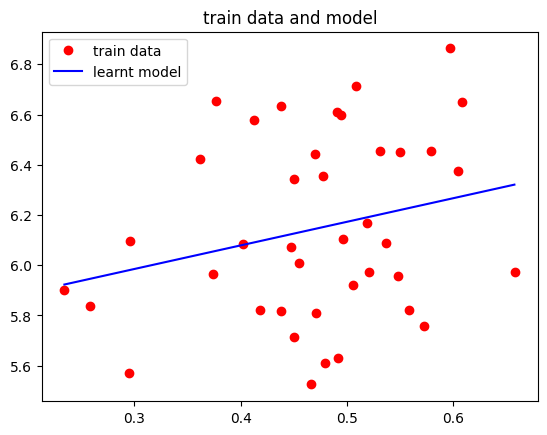

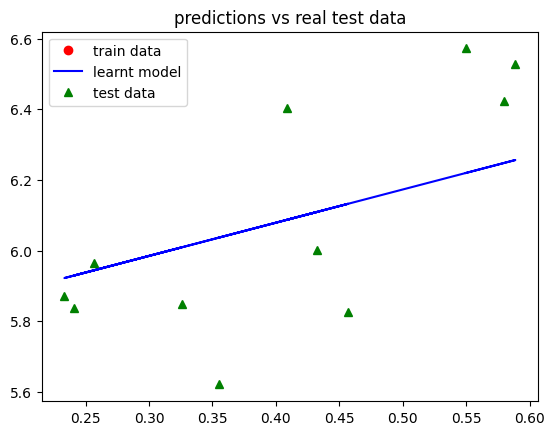

prediction error (manual):  0.058474419020015427
prediction error (tool):  0.05847441902001542


In [75]:
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v1_world-happiness-report-2017.csv')

input_string = 'Lipsa'
output_string = 'Happiness.Score'

#prediction_with_tool(filePath, input_string, output_string)
prediction_with_my_regression(filePath, input_string, output_string)